In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df_train = pd.read_csv('train_metrics.csv')
df_val = pd.read_csv('val_metrics.csv')
df_test = pd.read_csv('test_metrics.csv')

dfs = [df_train, df_val, df_test]

(array([124.,  10.,   2.,   1.,   2.,   3.,   0.,   2.,   0.,   1.]),
 array([0.       , 0.0050566, 0.0101132, 0.0151698, 0.0202264, 0.025283 ,
        0.0303396, 0.0353962, 0.0404528, 0.0455094, 0.050566 ]),
 <BarContainer object of 10 artists>)

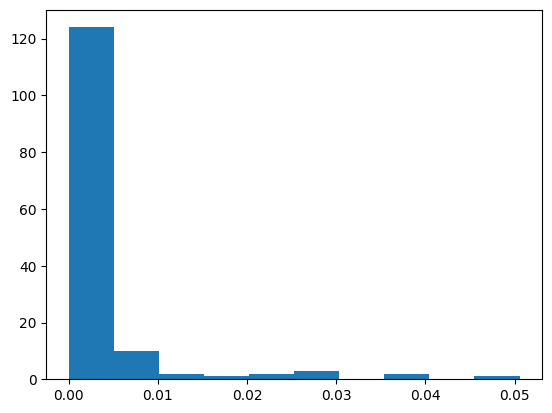

In [3]:
plt.hist(df_val['rmsd'])

In [6]:
for df in dfs:
    print(df.describe())

             index       filename          iou         dice  planarity_pca  \
count  1164.000000    1164.000000  1164.000000  1164.000000    1164.000000   
mean    581.500000   88995.823883     0.687282     0.806086      99.998807   
std     336.162163   69194.256001     0.127855     0.114609       0.005197   
min       0.000000      12.000000     0.066230     0.124232      99.938739   
25%     290.750000   14145.250000     0.661160     0.796022      99.999899   
50%     581.500000   78508.500000     0.716955     0.835147      99.999989   
75%     872.250000  139430.000000     0.760630     0.864043      99.999997   
max    1163.000000  249778.000000     0.892617     0.943262     100.000000   

       planarity_rms         rmsd  
count    1164.000000  1164.000000  
mean       99.857871     0.003946  
std         0.314992     0.008728  
min        97.524150     0.000000  
25%        99.899284     0.000390  
50%        99.967365     0.000865  
75%        99.983852     0.002771  
max      

(array([982.,  73.,  28.,  19.,  10.,  13.,  12.,   7.,   6.,  14.]),
 array([0.        , 0.0052764 , 0.0105528 , 0.01582919, 0.02110559,
        0.02638199, 0.03165839, 0.03693478, 0.04221118, 0.04748758,
        0.05276398]),
 <BarContainer object of 10 artists>)

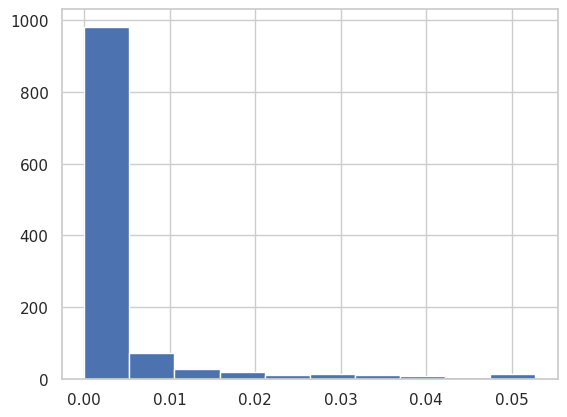

In [23]:
plt.hist(df_train['rmsd'])

(array([133.,   3.,   2.,   3.,   1.,   1.,   0.,   1.,   0.,   2.]),
 array([0.        , 0.00445993, 0.00891987, 0.0133798 , 0.01783973,
        0.02229966, 0.0267596 , 0.03121953, 0.03567946, 0.04013939,
        0.04459933]),
 <BarContainer object of 10 artists>)

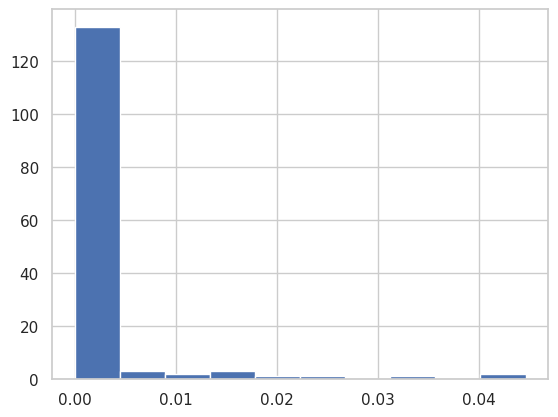

In [24]:
plt.hist(df_test['rmsd'])

In [19]:
df_val.describe()

,index,filename,iou,dice,planarity_pca,planarity_rms,rmsd
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,72.000000,90053.551724,0.620493,0.749489,99.999095,99.874441,0.003579
std,42.001984,69638.477295,0.167452,0.161199,0.003857,0.274303,0.007745
min,0.000000,86.000000,0.053333,0.101266,99.968521,98.225482,0.000000
25%,36.000000,18982.000000,0.563928,0.721169,99.999889,99.894469,0.000331
50%,72.000000,81484.000000,0.656000,0.792271,99.999988,99.966075,0.000823
75%,108.000000,140063.000000,0.734864,0.847172,99.999998,99.985304,0.002853
max,144.000000,247824.000000,0.827079,0.905356,100.000000,100.000000,0.050566


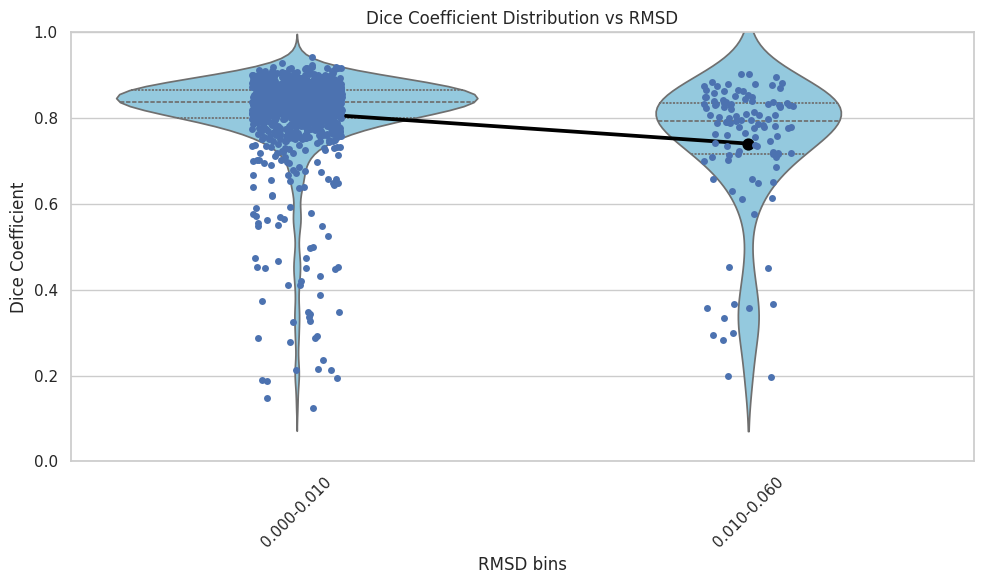

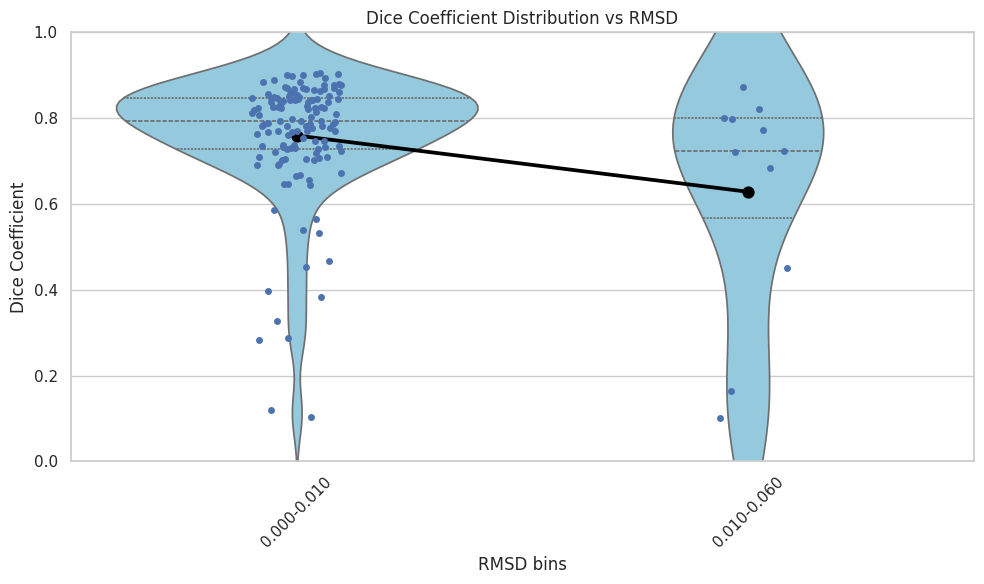

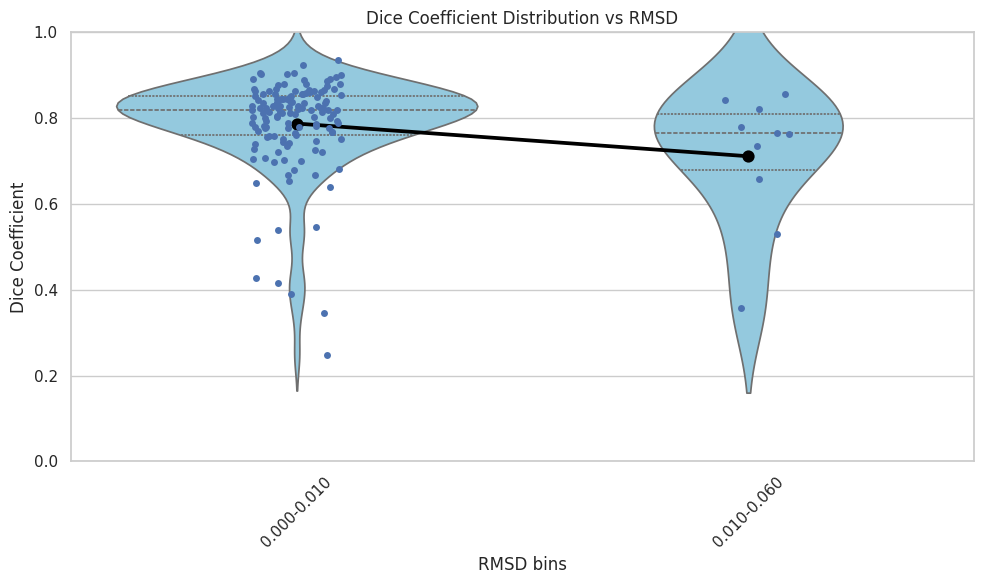

In [63]:
for df in dfs:
    sns.set(style="whitegrid")

    # --- Bin RMSD into desired categories ---
    bins = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06]

    #bins = [0.0, 0.02,  0.04, 0.06]

    bins = [0.0, 0.015, 0.03, 0.045, 0.06]

    bins = [0.0, 0.01, 0.06]

    labels = [f"{bins[i]:.3f}-{bins[i+1]:.3f}" for i in range(len(bins)-1)]
    df['rmsd_bin_label'] = pd.cut(df['rmsd'], bins=bins, labels=labels, include_lowest=True)

    # --- Plot ---
    plt.figure(figsize=(10,6))

    # Violin plot (updated for future Seaborn versions)
    sns.violinplot(
        data=df, 
        x='rmsd_bin_label', 
        y='dice', 
        inner='quartile',
        color="skyblue",           # Use color directly since no hue
        #density_norm='width'       # replaces scale="width"
    )


    sns.stripplot(x="rmsd_bin_label", y="dice", data=df)


    # Overlay mean point plot (updated)
    sns.pointplot(
        data=df, 
        x='rmsd_bin_label', 
        y='dice', 
        color='black', 
        markers='o', 
        linestyles='-', 
        errorbar=None              # replaces ci=None
    )

    plt.title("Dice Coefficient Distribution vs RMSD")
    plt.xlabel("RMSD bins")
    plt.ylabel("Dice Coefficient")
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()


In [7]:
df_test[(df_test['rmsd'] >= 0.03) & (df_test['rmsd'] < 0.04)]

,index,filename,atom_count,iou,dice,planarity_pca,planarity_rms,rmsd
117,117,69986,tensor(15),0.749471,0.856797,99.980114,98.589679,0.034363


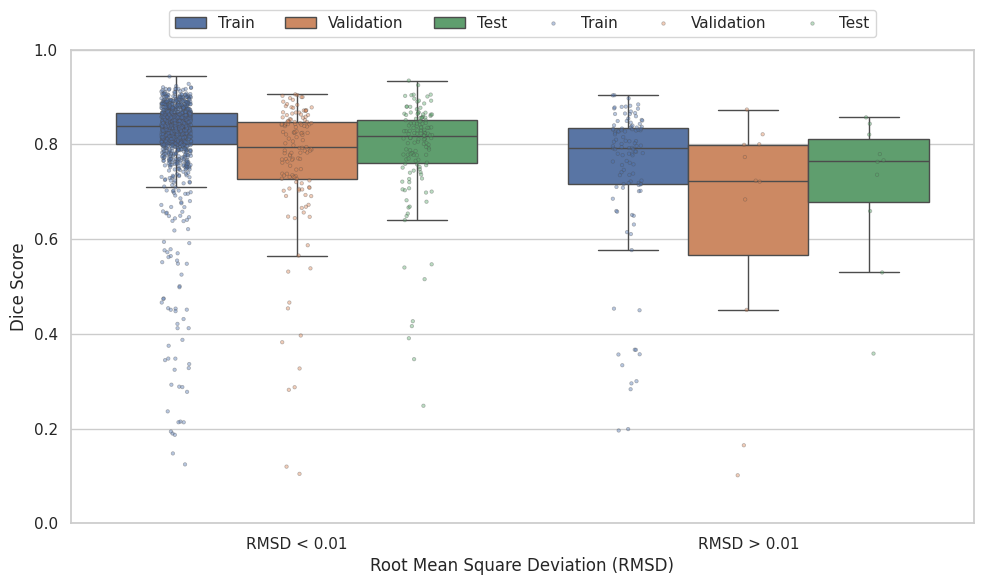

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


names = ["Train", "Validation", "Test"]

# Add dataset labels and combine
for df, name in zip(dfs, names):
    df["dataset"] = name
df_all = pd.concat(dfs, ignore_index=True)

# --- Bin RMSD into desired categories ---
bins = [0.0, 0.01, 0.06]  # you can refine bins here
labels = [f"{bins[i]:.3f}-{bins[i+1]:.3f}" for i in range(len(bins)-1)]

labels = [f"RMSD < 0.01", f"RMSD > 0.01"]
df_all['rmsd_bin_label'] = pd.cut(df_all['rmsd'], bins=bins, labels=labels, include_lowest=True)

# --- Plot ---
plt.figure(figsize=(10,6))
sns.set(style="whitegrid")

# Boxplot for distributions
sns.boxplot(
    data=df_all,
    x='rmsd_bin_label',
    y='dice',
    hue='dataset',
    showfliers=False
)

# Overlay raw points
sns.stripplot(
    data=df_all,
    x='rmsd_bin_label',
    y='dice',
    hue='dataset',
    dodge=True,
    alpha=0.4,
    jitter=True,
    linewidth=0.5,
    marker="."
)



#plt.title("Dice Coefficient Distribution vs RMSD")
plt.xlabel("Root Mean Square Deviation (RMSD)")
plt.ylabel("Dice Score")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=6) # Change this to the number of)
plt.tight_layout()
plt.savefig('rmsd.png')
plt.show()


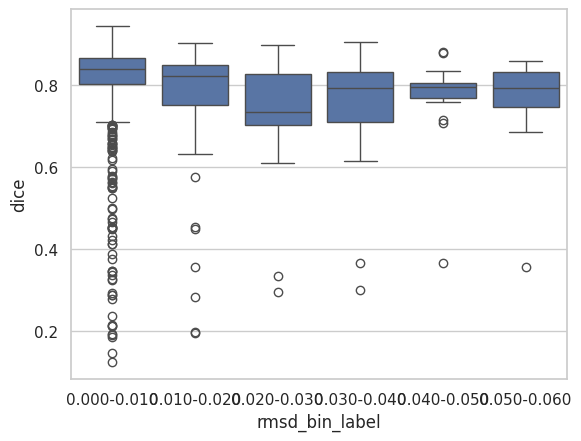

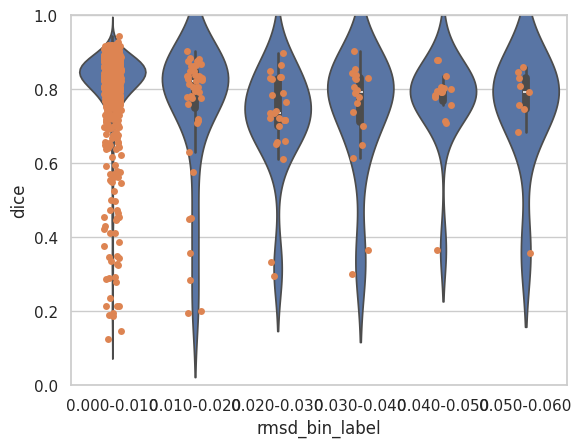

/scratch/phys/sin/sethih1/venv/masque_env/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 80.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='rmsd_bin_label', ylabel='dice'>

/scratch/phys/sin/sethih1/venv/masque_env/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 81.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/scratch/phys/sin/sethih1/venv/masque_env/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 81.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


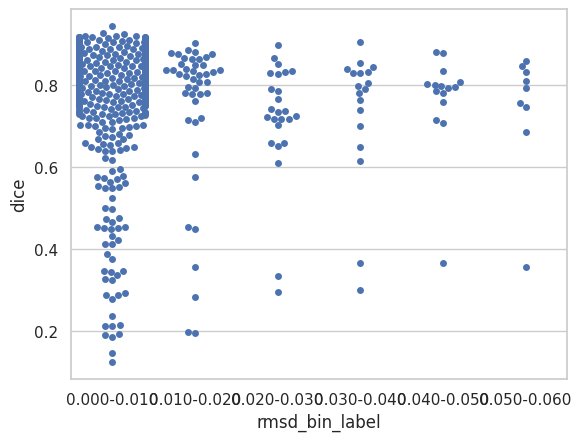

In [57]:
df = df_train

bins = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06]

#bins = [0.0, 0.02,  0.04, 0.06]
#bins = [0.0, 0.015, 0.03, 0.045, 0.06]
labels = [f"{bins[i]:.3f}-{bins[i+1]:.3f}" for i in range(len(bins)-1)]
df['rmsd_bin_label'] = pd.cut(df['rmsd'], bins=bins, labels=labels, include_lowest=True)
sns.boxplot(x="rmsd_bin_label", y="dice", data=df)
#sns.stripplot(x="rmsd_bin_label", y="dice", data=df)
plt.show()
sns.violinplot(x="rmsd_bin_label", y="dice", data=df, density_norm='width')

sns.stripplot(x="rmsd_bin_label", y="dice", data=df)
plt.ylim([0,1])
plt.show()

sns.swarmplot(x="rmsd_bin_label", y="dice", data=df)

In [9]:
bins = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06]
t = {}

for i in range(len(bins) - 1):
    t[i] = df_val[(df_val['rmsd'] >= bins[i]) & (df_val['rmsd'] < bins[i+1])]

In [15]:
t[5]

,index,filename,atom_count,iou,dice,planarity_pca,planarity_rms,rmsd
127,127,82018,tensor(18),0.053333,0.101266,99.968521,98.225482,0.050566


In [14]:
df.head

<bound method NDFrame.head of      index  filename  atom_count       iou      dice  planarity_pca  \
0        0    100650  tensor(23)  0.700756  0.824052     100.000000   
1        1    100795  tensor(22)  0.653363  0.790344      99.999898   
2        2    100816  tensor(26)  0.606072  0.754726      99.999650   
3        3    101325  tensor(27)  0.700835  0.824107      99.999998   
4        4     10141  tensor(20)  0.633907  0.775940     100.000000   
..     ...       ...         ...       ...       ...            ...   
140    140     96339  tensor(18)  0.195271  0.326740      99.999403   
141    141     96695  tensor(19)  0.758909  0.862931      99.999965   
142    142     97250  tensor(19)  0.540846  0.702012      99.999992   
143    143     97906  tensor(17)  0.584541  0.737805      99.999981   
144    144       980  tensor(15)  0.770998  0.870693      99.999999   

     planarity_rms      rmsd rmsd_bin_label  
0        99.994308  0.000182      0.00-0.01  
1        99.898925  0.003